In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import pandas as pd

In [ ]:
activity = pd.read_csv('/content/drive/MyDrive/Venturas_Ltd/activity.csv')

In [ ]:
target = pd.read_csv('/content/drive/MyDrive/Venturas_Ltd/target.csv')

In [ ]:
activity.head()

,date,customer,activity_type,activity_count
0,2021-01-20,0032j000002jRYxAAM,a,1
1,2021-05-11,0032j00000FZcIvAAL,a,1
2,2020-12-09,0032j000002gKM8AAM,a,1
3,2021-03-30,0032j000001UX7cAAG,a,1
4,2020-10-19,0032j000004etUWAAY,a,1


In [ ]:
activity.size

3619088

In [ ]:
target.head()

,customer,date
0,0032j000001UaIdAAK,2020-11-06
1,0032j000002hwpFAAQ,2021-05-20
2,0032j0000077nwFAAQ,2020-12-18
3,0032j000001UU6aAAG,2020-11-20
4,0032j000001UFAIAA4,2021-02-18


In [ ]:
target.size

8712

In [ ]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904772 entries, 0 to 904771
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            904772 non-null  object
 1   customer        904772 non-null  object
 2   activity_type   904772 non-null  object
 3   activity_count  904772 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 27.6+ MB


In [ ]:
activity['customer'].describe()

count                 904772
unique                139556
top       0032j000002j4GWAAY
freq                    2679
Name: customer, dtype: object

In [ ]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4356 entries, 0 to 4355
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   customer  4356 non-null   object
 1   date      4356 non-null   object
dtypes: object(2)
memory usage: 68.2+ KB


In [ ]:
target['date'].describe()

count           4356
unique           187
top       2021-03-05
freq              50
Name: date, dtype: object

In [ ]:
target.corrwith(activity, axis = 0)

activity_count   NaN
dtype: float64

In [ ]:
target['label'] = 1

In [ ]:
target

,customer,date,label
0,0032j000001UaIdAAK,2020-11-06,1
1,0032j000002hwpFAAQ,2021-05-20,1
2,0032j0000077nwFAAQ,2020-12-18,1
3,0032j000001UU6aAAG,2020-11-20,1
4,0032j000001UFAIAA4,2021-02-18,1
...,...,...,...
4351,0032j00000BHLtnAAH,2021-05-07,1
4352,0032j00000FafiJAAR,2021-04-20,1
4353,0032j000004dfk5AAA,2021-05-20,1
4354,0032j000002j97vAAA,2021-03-12,1


In [ ]:
activity['activity_count'].value_counts()

1    904772
Name: activity_count, dtype: int64

In [ ]:
activity['date'].value_counts()

2021-02-16    10141
2021-03-09     9172
2021-02-22     8494
2021-03-18     8264
2021-02-12     8260
              ...  
2020-09-20      152
2020-10-18      127
2020-10-04      122
2021-01-01       90
2021-05-23       66
Name: date, Length: 265, dtype: int64

In [ ]:
activity['activity_type'].value_counts()

m    141826
l    105307
x     87210
u     72070
j     67173
n     66369
a     54025
h     51355
i     38058
p     32318
b     30453
f     28804
y     26521
t     22475
v     20111
o     19318
w     18691
s     10313
c      6115
d      2728
k      1891
r      1032
q       490
e        71
g        48
Name: activity_type, dtype: int64

In [ ]:
activity_new = pd.merge(activity, target, on=['customer', 'date'], how='left')

In [ ]:
activity_new = activity_new.fillna(0)

In [ ]:
activity_new

,date,customer,activity_type,activity_count,label
0,2021-01-20,0032j000002jRYxAAM,a,1,0.0
1,2021-05-11,0032j00000FZcIvAAL,a,1,0.0
2,2020-12-09,0032j000002gKM8AAM,a,1,0.0
3,2021-03-30,0032j000001UX7cAAG,a,1,0.0
4,2020-10-19,0032j000004etUWAAY,a,1,0.0
...,...,...,...,...,...
904767,2020-10-16,0032j00000BHEpXAAX,f,1,0.0
904768,2020-10-16,0032j00000BHEqDAAX,f,1,0.0
904769,2020-10-16,0032j00000BHEo8AAH,f,1,0.0
904770,2020-10-16,0032j00000BHDuCAAX,f,1,0.0


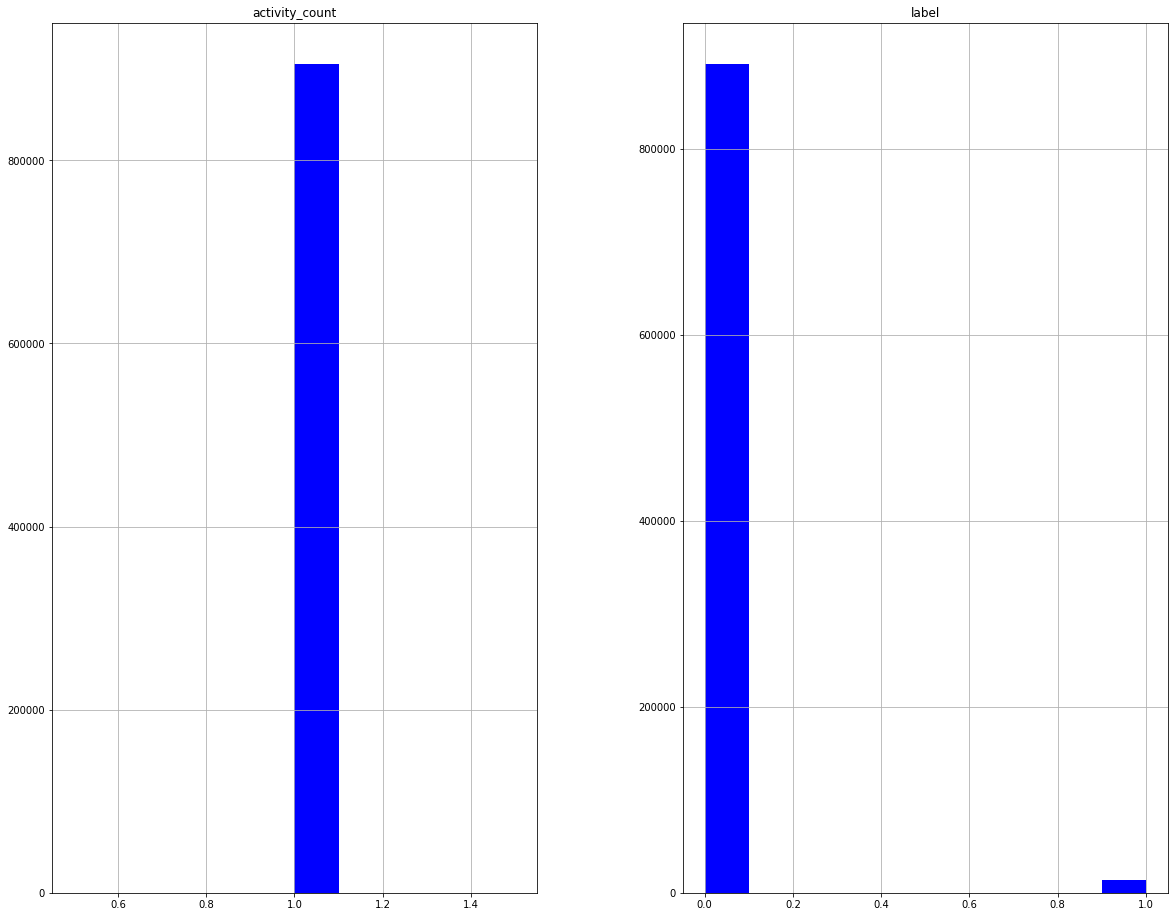

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

activity_new.hist(figsize=(20,16), color = 'blue');

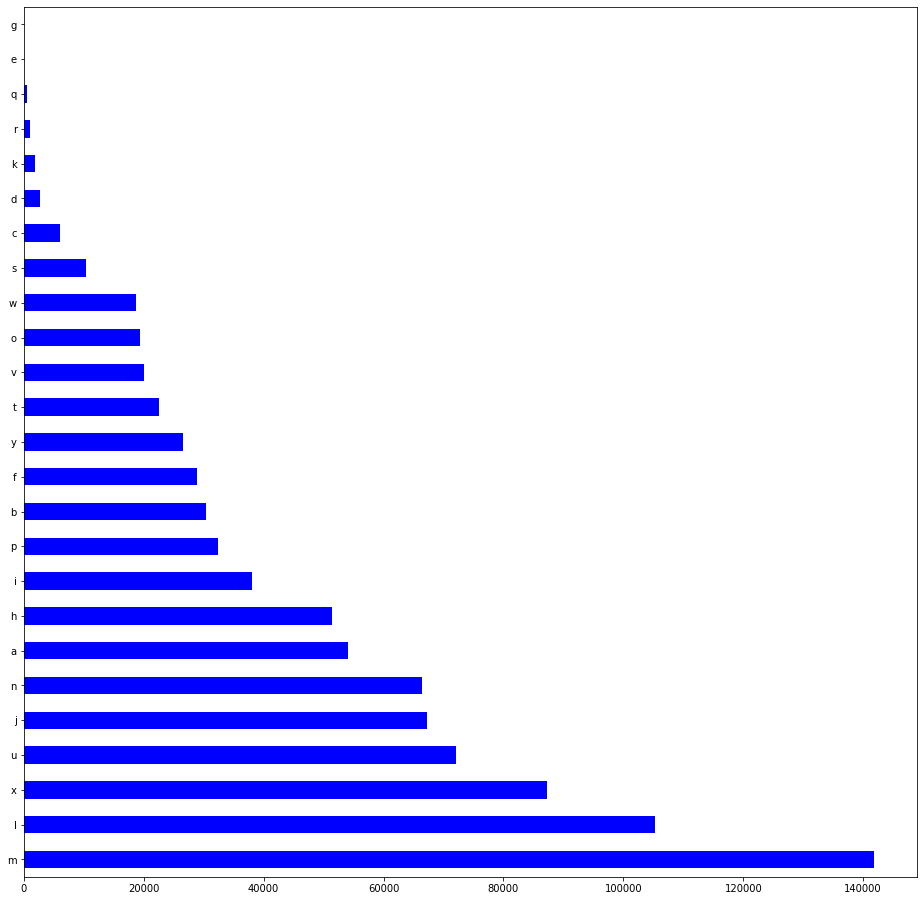

In [ ]:
plot = activity_new['activity_type'].value_counts().plot(figsize=(16,16),kind='barh', color='blue')
plot.figure.savefig('/content/drive/MyDrive/Venturas_Ltd/activity_type_distributions.png')

In [ ]:
activity_new['label'].value_counts()

0.0    891078
1.0     13694
Name: label, dtype: int64

In [ ]:
values = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
for i in values:
  print("#####",i,"#####")
  filt = activity_new['activity_type'] == i
  print(activity_new.loc[filt]['label'].value_counts())

##### a #####
0.0    53642
1.0      383
Name: label, dtype: int64
##### b #####
0.0    30435
1.0       18
Name: label, dtype: int64
##### c #####
0.0    6090
1.0      25
Name: label, dtype: int64
##### d #####
0.0    2723
1.0       5
Name: label, dtype: int64
##### e #####
0.0    71
Name: label, dtype: int64
##### f #####
0.0    28804
Name: label, dtype: int64
##### g #####
0.0    48
Name: label, dtype: int64
##### h #####
0.0    51120
1.0      235
Name: label, dtype: int64
##### i #####
0.0    37175
1.0      883
Name: label, dtype: int64
##### j #####
0.0    66950
1.0      223
Name: label, dtype: int64
##### k #####
0.0    1889
1.0       2
Name: label, dtype: int64
##### l #####
0.0    101291
1.0      4016
Name: label, dtype: int64
##### m #####
0.0    139151
1.0      2675
Name: label, dtype: int64
##### n #####
0.0    64634
1.0     1735
Name: label, dtype: int64
##### o #####
0.0    19231
1.0       87
Name: label, dtype: int64
##### p #####
0.0    31570
1.0      748
Name: label, dtyp

In [ ]:
activity_new.describe()

,activity_count,label
count,904772.0,904772.000000
mean,1.0,0.015135
std,0.0,0.122091
min,1.0,0.000000
25%,1.0,0.000000
50%,1.0,0.000000
75%,1.0,0.000000
max,1.0,1.000000


### Down Sample data distribution Check

In [ ]:
from sklearn.utils import resample

activity_new_majority = activity_new[activity_new.label==0]
activity_new_minority = activity_new[activity_new.label==1]

activity_new_majority_downsampled = resample(activity_new_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=13694,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
activity_new_downsampled = pd.concat([activity_new_majority_downsampled, activity_new_minority])

In [ ]:
values = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
for i in values:
  print("#####",i,"#####")
  filt = activity_new_downsampled['activity_type'] == i
  print(activity_new_downsampled.loc[filt]['label'].value_counts())

##### a #####
0.0    797
1.0    383
Name: label, dtype: int64
##### b #####
0.0    484
1.0     18
Name: label, dtype: int64
##### c #####
0.0    92
1.0    25
Name: label, dtype: int64
##### d #####
0.0    37
1.0     5
Name: label, dtype: int64
##### e #####
0.0    1
Name: label, dtype: int64
##### f #####
0.0    455
Name: label, dtype: int64
##### g #####
Series([], Name: label, dtype: int64)
##### h #####
0.0    761
1.0    235
Name: label, dtype: int64
##### i #####
1.0    883
0.0    539
Name: label, dtype: int64
##### j #####
0.0    1077
1.0     223
Name: label, dtype: int64
##### k #####
0.0    22
1.0     2
Name: label, dtype: int64
##### l #####
1.0    4016
0.0    1607
Name: label, dtype: int64
##### m #####
1.0    2675
0.0    2129
Name: label, dtype: int64
##### n #####
1.0    1735
0.0    1010
Name: label, dtype: int64
##### o #####
0.0    316
1.0     87
Name: label, dtype: int64
##### p #####
1.0    748
0.0    459
Name: label, dtype: int64
##### q #####
0.0    6
Name: label, dtyp

### Up Sample Data Distribution Check

In [ ]:
from sklearn.utils import resample

activity_new_majority = activity_new[activity_new.label==0]
activity_new_minority = activity_new[activity_new.label==1]

activity_new_minority_downsampled = resample(activity_new_minority, 
                                 replace=True,    # sample without replacement
                                 n_samples=891078,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
activity_new_upsampled = pd.concat([activity_new_minority_downsampled, activity_new_majority])

In [ ]:
values = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
for i in values:
  print("#####",i,"#####")
  filt = activity_new_upsampled['activity_type'] == i
  print(activity_new_upsampled.loc[filt]['label'].value_counts())

##### a #####
0.0    53642
1.0    25004
Name: label, dtype: int64
##### b #####
0.0    30435
1.0     1159
Name: label, dtype: int64
##### c #####
0.0    6090
1.0    1644
Name: label, dtype: int64
##### d #####
0.0    2723
1.0     332
Name: label, dtype: int64
##### e #####
0.0    71
Name: label, dtype: int64
##### f #####
0.0    28804
Name: label, dtype: int64
##### g #####
0.0    48
Name: label, dtype: int64
##### h #####
0.0    51120
1.0    15493
Name: label, dtype: int64
##### i #####
1.0    57750
0.0    37175
Name: label, dtype: int64
##### j #####
0.0    66950
1.0    14370
Name: label, dtype: int64
##### k #####
0.0    1889
1.0     127
Name: label, dtype: int64
##### l #####
1.0    261384
0.0    101291
Name: label, dtype: int64
##### m #####
1.0    173931
0.0    139151
Name: label, dtype: int64
##### n #####
1.0    112817
0.0     64634
Name: label, dtype: int64
##### o #####
0.0    19231
1.0     5603
Name: label, dtype: int64
##### p #####
1.0    48696
0.0    31570
Name: label, dt

### Observation

In [ ]:
values = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
for i in values:
  print("##### Normal Data: ",i,"#####")
  filt = activity_new['activity_type'] == i
  print(activity_new.loc[filt]['label'].value_counts())
  print("##### Down Sampled Data: ",i,"#####")
  filt1 = activity_new_downsampled['activity_type'] == i
  print(activity_new_downsampled.loc[filt1]['label'].value_counts())
  print("##### Up Sampled Data: ",i,"#####")
  filt2 = activity_new_upsampled['activity_type'] == i
  print(activity_new_upsampled.loc[filt2]['label'].value_counts())

##### Normal Data:  a #####
0.0    53642
1.0      383
Name: label, dtype: int64
##### Down Sampled Data:  a #####
0.0    797
1.0    383
Name: label, dtype: int64
##### Up Sampled Data:  a #####
0.0    53642
1.0    25004
Name: label, dtype: int64
##### Normal Data:  b #####
0.0    30435
1.0       18
Name: label, dtype: int64
##### Down Sampled Data:  b #####
0.0    484
1.0     18
Name: label, dtype: int64
##### Up Sampled Data:  b #####
0.0    30435
1.0     1159
Name: label, dtype: int64
##### Normal Data:  c #####
0.0    6090
1.0      25
Name: label, dtype: int64
##### Down Sampled Data:  c #####
0.0    92
1.0    25
Name: label, dtype: int64
##### Up Sampled Data:  c #####
0.0    6090
1.0    1644
Name: label, dtype: int64
##### Normal Data:  d #####
0.0    2723
1.0       5
Name: label, dtype: int64
##### Down Sampled Data:  d #####
0.0    37
1.0     5
Name: label, dtype: int64
##### Up Sampled Data:  d #####
0.0    2723
1.0     332
Name: label, dtype: int64
##### Normal Data:  e #####


### Data Checking

In [ ]:
activities = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y']
important_activities = []
values = []
for i in activities:
  x, y = 0,0
  print("##### Down Sampled Data: ",i,"#####")
  filt = activity_new_downsampled['activity_type'] == i
  try:
    x = activity_new_downsampled.loc[filt]['label'].value_counts()[0]
    print("X: ",x)
  except:
    pass
  try:
    y = activity_new_downsampled.loc[filt]['label'].value_counts()[1]
    print("Y: ",y)
  except:
    pass
  if x>y:
    print("x, y", x,y)
    print("x is higher than y: ",(x/y))
    label = 0
    values.append(label)
    print(values)
  elif y>x:
    print("x, y", x,y)
    print("y is higher than x: ",(y/x))
    label = 1
    values.append(label)
    important_activities.append(i)
    print("important activities are: ",important_activities)
  else:
    label = 0
    values.append(label)

print("555555555",values)


##### Down Sampled Data:  a #####
X:  797
Y:  383
x, y 797 383
x is higher than y:  2.0809399477806787
[0]
##### Down Sampled Data:  b #####
X:  484
Y:  18
x, y 484 18
x is higher than y:  26.88888888888889
[0, 0]
##### Down Sampled Data:  c #####
X:  92
Y:  25
x, y 92 25
x is higher than y:  3.68
[0, 0, 0]
##### Down Sampled Data:  d #####
X:  37
Y:  5
x, y 37 5
x is higher than y:  7.4
[0, 0, 0, 0]
##### Down Sampled Data:  e #####
X:  1
x, y 1 0
x is higher than y:  inf
[0, 0, 0, 0, 0]
##### Down Sampled Data:  f #####
X:  455
x, y 455 0
x is higher than y:  inf
[0, 0, 0, 0, 0, 0]
##### Down Sampled Data:  g #####
##### Down Sampled Data:  h #####
X:  761
Y:  235
x, y 761 235
x is higher than y:  3.2382978723404254
[0, 0, 0, 0, 0, 0, 0, 0]
##### Down Sampled Data:  i #####
X:  539
Y:  883
x, y 539 883
y is higher than x:  1.6382189239332097
important activities are:  ['i']
##### Down Sampled Data:  j #####
X:  1077
Y:  223
x, y 1077 223
x is higher than y:  4.829596412556054
[0, 0, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in long_scalars


X:  317
Y:  197
x, y 317 197
x is higher than y:  1.6091370558375635
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0]
##### Down Sampled Data:  u #####
X:  1140
Y:  258
x, y 1140 258
x is higher than y:  4.4186046511627906
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0]
##### Down Sampled Data:  v #####
X:  285
Y:  519
x, y 285 519
y is higher than x:  1.8210526315789475
important activities are:  ['i', 'l', 'm', 'n', 'p', 'r', 'v']
##### Down Sampled Data:  w #####
X:  268
Y:  394
x, y 268 394
y is higher than x:  1.4701492537313432
important activities are:  ['i', 'l', 'm', 'n', 'p', 'r', 'v', 'w']
##### Down Sampled Data:  x #####
X:  1348
Y:  423
x, y 1348 423
x is higher than y:  3.186761229314421
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0]
##### Down Sampled Data:  y #####
X:  374
Y:  783
x, y 374 783
y is higher than x:  2.093582887700535
important activities are:  ['i', 'l', 'm', 'n', 'p', 'r', 'v', 'w', 'y']
555555555 [0

In [ ]:
df = pd.DataFrame({'activity_type': activities, 'contribution': values})

In [ ]:
df

,activity_type,contribution
0,a,0
1,b,0
2,c,0
3,d,0
4,e,0
5,f,0
6,g,0
7,h,0
8,i,1
9,j,0
